<a href="https://colab.research.google.com/github/gianmarco-holm/PY06_MachineLearning_LogisticRegressionMultinomial_BeanPrediction/blob/main/PY06_MachineLearning_LogisticRegressionMultinomial_BeanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresión Logística Multiclase de Predicción de tipo de Frijol

Este proyecto nos ayuda a predecir en base a diferentes características que tipo de frijol es, este modelo tiene una precisión del 95% y se ha usado diferentes tecnicas y algoritmo para llegar a este porcentaje.

## Importar librerías

In [ ]:
# Librerías de transformación
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

# Librería de Machine Learning
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

# Librería de Visualización
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=.8, rc={'figure.figsize':(8,4)}, style='dark', palette='deep', context='notebook')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ETL

In [ ]:
# Carga de datos
df_data = pd.read_csv('./drive/MyDrive/machine_learning/data/Dry_Bean.csv')
df_data.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
# Tipo de datos
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
# Valores de la variable dependiente
df_data.Class.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [ ]:
# Ver cuantos datos duplicados
df_data.duplicated().sum()

68

In [ ]:
# Cuantos duplicados tiene cada columna
df_data.apply(lambda x: x.duplicated().sum())

Area                1600
Perimeter            260
MajorAxisLength       68
MinorAxisLength       68
AspectRation          68
Eccentricity          68
ConvexArea          1545
EquivDiameter       1600
Extent                76
Solidity              89
roundness             71
Compactness           68
ShapeFactor1          90
ShapeFactor2         105
ShapeFactor3          68
ShapeFactor4          79
Class              13604
dtype: int64

In [ ]:
# Ver los datos duplicados
df_data[df_data.duplicated(keep=False)]

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5504,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5505,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5508,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5509,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5547,38427,756.323,306.533886,160.591784,1.908777,0.851782,38773,221.193978,0.796976,0.991076,0.844174,0.721597,0.007977,0.001334,0.520702,0.993905,HOROZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285,63948,996.497,412.297178,198.877557,2.073121,0.875971,64641,285.343867,0.777909,0.989279,0.809254,0.692083,0.006447,0.000912,0.478979,0.992981,HOROZ
7339,65766,1035.842,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ
7340,65766,1035.842,406.416622,207.242369,1.961069,0.860218,66698,289.371512,0.792295,0.986027,0.770237,0.712007,0.006180,0.000980,0.506954,0.994172,HOROZ
7341,65781,1039.257,409.713859,204.992832,1.998674,0.865834,66762,289.404510,0.642549,0.985306,0.765358,0.706358,0.006228,0.000956,0.498941,0.997221,HOROZ


In [ ]:
# Eliminar las filas duplicadas
df_data.drop_duplicates(inplace=True)

In [ ]:
# Ver cuantos nulos hay
df_data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

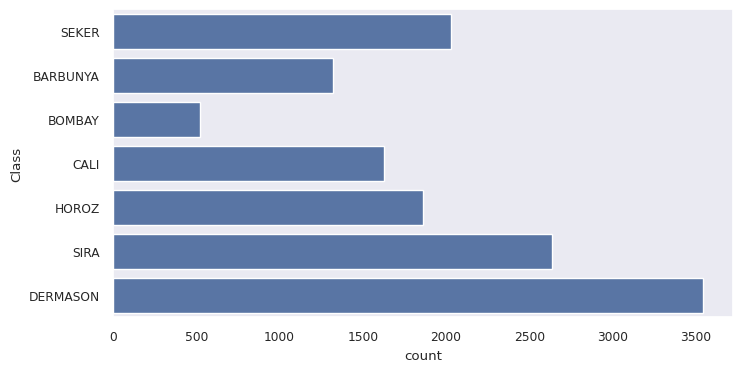

In [ ]:
# Vemos la distribución de las muestras de la variable dependiente
sns.countplot(df_data.Class);

In [ ]:
# Necesitamos balancear las muestras, asi que usarmos el siguiente codigo
under_sample = RandomUnderSampler(random_state=42)

X = df_data.drop('Class',axis=1)
y = df_data.Class

X_resampled , y_resampled = under_sample.fit_resample(X,y)

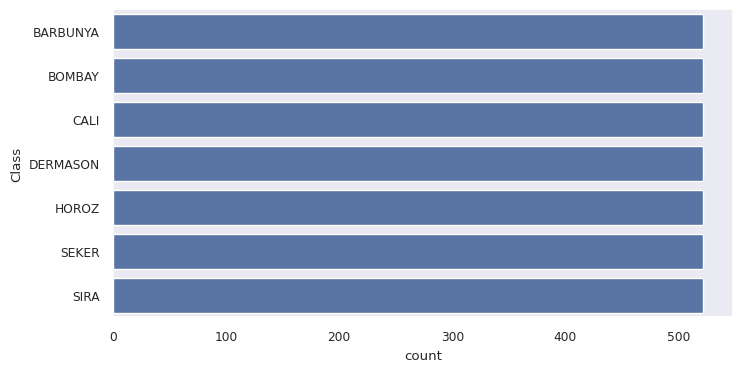

In [ ]:
# Visualizamos la nueva muestra balanceada
sns.countplot(y_resampled);

In [ ]:
print(f'{df_data.shape}\n{X_resampled.shape}')

(13543, 17)
(3654, 16)


In [ ]:
# Unimos la data del muestreo balanceado
df_data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [ ]:
# Codificamos la variable dependiente
le = LabelEncoder()
df_data_resampled['Class'] = le.fit_transform(df_data_resampled['Class'])

In [ ]:
# Vemos que categoria pertenece a cada codificacion de Class
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}


## Análisis exploratorio de datos

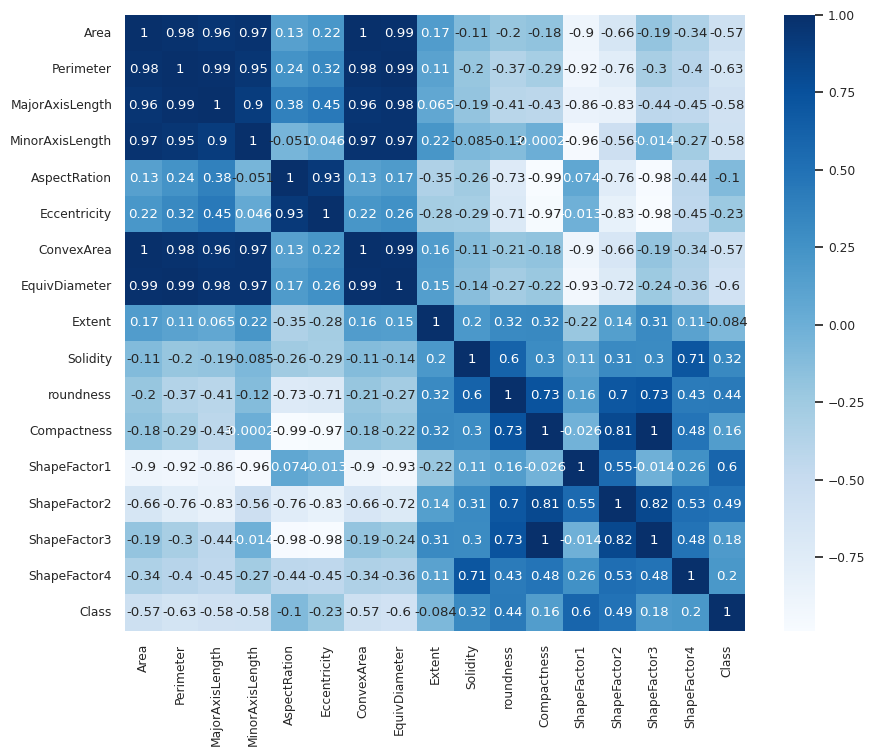

In [ ]:
# Matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(df_data_resampled.corr(), annot=True, cmap='Blues');
# Vemos que hay variables con correlación perfecta entre variables independientes, lo que representa multicolinealidad

<Axes: >

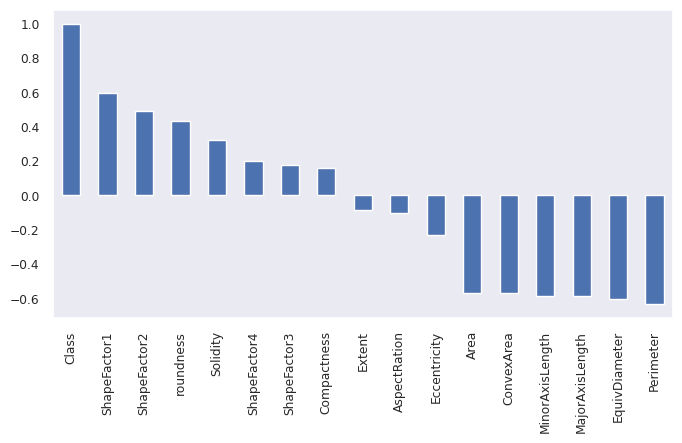

In [ ]:
# Correlación de Class
df_data_resampled.corr()['Class'].sort_values(ascending=False).plot(kind='bar')
# Podemos ver que variables tienen mayor correlación con la variable dependiente Class

In [ ]:
# Eliminamos las columnas con multicolinealidad
X = df_data_resampled.drop(['Class','Compactness','EquivDiameter','ConvexArea'], axis=1)
y = df_data_resampled.Class

## Visualización de datos

In [ ]:
#sns.pairplot(df_dea, hue='Class')

## Split y escalamiento de datos

In [ ]:
# Con shuffle barajamos bien las muestras y divimos un conjunto de datos para el entrenamiento y otro para el test
X_train, X_test, y_train , y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size= .2)

In [ ]:
# Escalamos los datos
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

## Modelo multiclase

In [ ]:
# Creamos esta función para analizar los diferentes modelos que hay para la regresión logística multinomial con los diferentes algoritmos (solver),
# diferentes tipos de clasificacion (multiclass), con todos los procesadores y con un coeficiente de 1 para la regularización fuerte del modelo y evitar el sobreajuste
def logistic_model(C_,solver_ , multiclass_):
    logistic_regression_model = LogisticRegression(random_state=42, solver= solver_, multi_class= multiclass_, n_jobs=-1, C=C_ )
    return logistic_regression_model

In [ ]:
multiclass = ['ovr','multinomial']
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scores = []
params=[]
for i in multiclass:
    for j in solver_list:
        try:
            model = logistic_model(1,j,i)
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            params.append(i + '-'+ j)
            accuraccy = accuracy_score(y_test,predictions)
            scores.append(accuraccy)
        except:
            None

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The

## Evaluación de resultados

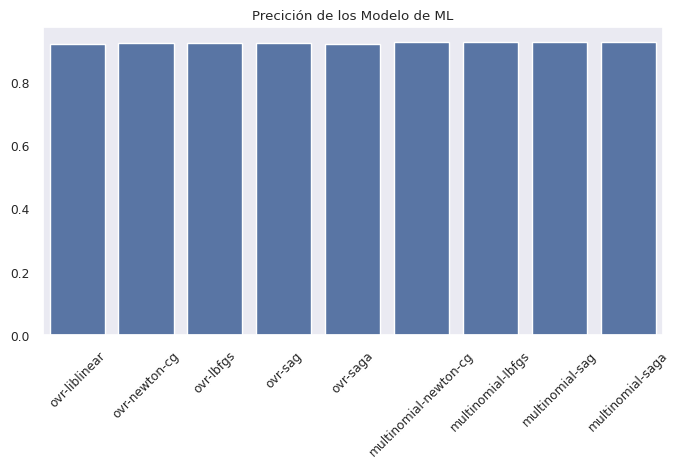

In [ ]:
# Vemos que algoritmo para la funcion de perdida (solver) y tipo de clasificación(multi_class) podemos usar para este caso
sns.barplot(x=params, y=scores).set_title('Precición de los Modelo de ML')
plt.xticks(rotation=45);

In [ ]:
# Obtengo el modelo con mayor puntaje
max = scores.index(np.max(scores))
print(params[max])
print(scores[max])

multinomial-newton-cg
0.9247606019151847


In [ ]:
model = logistic_model(1,'newton-cg','multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[119   0   5   0   1   0   3]
 [  0  98   0   0   0   0   0]
 [  5   0  97   0   0   0   1]
 [  0   0   0  90   0   5  10]
 [  0   0   4   1  91   0   0]
 [  3   0   0   0   0  84   4]
 [  0   0   1   6   6   0  97]]
0.9247606019151847


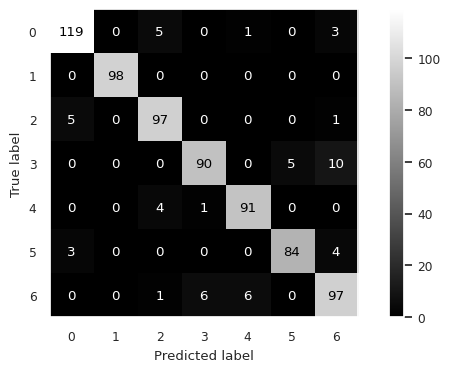

In [ ]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()

In [ ]:
# Como vemos anteriomente tenemos un puntaje de precisión del 92%, siendo perfecto el modelo
# Ahora veremos el reporte de clasificación
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       128
           1       1.00      1.00      1.00        98
           2       0.91      0.94      0.92       103
           3       0.93      0.86      0.89       105
           4       0.93      0.95      0.94        96
           5       0.94      0.92      0.93        91
           6       0.84      0.88      0.86       110

    accuracy                           0.92       731
   macro avg       0.93      0.93      0.93       731
weighted avg       0.93      0.92      0.92       731

